In [8]:
import json

file_path = "E:\\term2\\Reddit-Eckankar.json"

with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)
data

[{'Position': '1',
  'Comment': 'I’m not sure I understand the hill you’re trying to die on.\n\nAre you trying to say people who make stuff up aren’t willing to go down with the ship? Because boy, have I got the list for you!\n\nThousands of Subscribers to Scientology\n\nThe Jonestown Massacre\n\nOld Believers, during the Schism of the Russian Church\n\nAdolf Hitler himself\n\nYogmaya Neupane\n\nThe Peoples Temple(not a typo)\n\nOrder of the Solar Temple, twice!\n\nHeaven’s Gate\n\nBéchard Lane Eckankar\n\nAdam’s House\n\nThe Burari Deaths\n\nThe Movement for the Restoration of the Ten Commandments of God(in Uganda)\n\nThis list, sadly, goes on and on and on.',
  'Thread Link': None,
  'Comment Author': 'kp012202',
  'Comment Author Link': 'https://www.reddit.com/search/#',
  'Comment Time': '9 days ago',
  'Comment Upvotes': '8',
  'Subreddit': 'r/DebateAChristian',
  'Subreddit Link': 'https://www.reddit.com/r/DebateAChristian/',
  'Post Title': None,
  'Post Link': None,
  'Post Tim

In [9]:
data[0],len(data)

({'Position': '1',
  'Comment': 'I’m not sure I understand the hill you’re trying to die on.\n\nAre you trying to say people who make stuff up aren’t willing to go down with the ship? Because boy, have I got the list for you!\n\nThousands of Subscribers to Scientology\n\nThe Jonestown Massacre\n\nOld Believers, during the Schism of the Russian Church\n\nAdolf Hitler himself\n\nYogmaya Neupane\n\nThe Peoples Temple(not a typo)\n\nOrder of the Solar Temple, twice!\n\nHeaven’s Gate\n\nBéchard Lane Eckankar\n\nAdam’s House\n\nThe Burari Deaths\n\nThe Movement for the Restoration of the Ten Commandments of God(in Uganda)\n\nThis list, sadly, goes on and on and on.',
  'Thread Link': None,
  'Comment Author': 'kp012202',
  'Comment Author Link': 'https://www.reddit.com/search/#',
  'Comment Time': '9 days ago',
  'Comment Upvotes': '8',
  'Subreddit': 'r/DebateAChristian',
  'Subreddit Link': 'https://www.reddit.com/r/DebateAChristian/',
  'Post Title': None,
  'Post Link': None,
  'Post Tim

In [11]:
reduced_data = []

for i in data:
    reduced_i = {'username': i['Comment Author'], 'text': i['Comment']}
    reduced_data.append(reduced_i)

# Now, reduced_data contains only the 'username' and 'text' fields of each tweet
reduced_data[0]

{'username': 'kp012202',
 'text': 'I’m not sure I understand the hill you’re trying to die on.\n\nAre you trying to say people who make stuff up aren’t willing to go down with the ship? Because boy, have I got the list for you!\n\nThousands of Subscribers to Scientology\n\nThe Jonestown Massacre\n\nOld Believers, during the Schism of the Russian Church\n\nAdolf Hitler himself\n\nYogmaya Neupane\n\nThe Peoples Temple(not a typo)\n\nOrder of the Solar Temple, twice!\n\nHeaven’s Gate\n\nBéchard Lane Eckankar\n\nAdam’s House\n\nThe Burari Deaths\n\nThe Movement for the Restoration of the Ten Commandments of God(in Uganda)\n\nThis list, sadly, goes on and on and on.'}

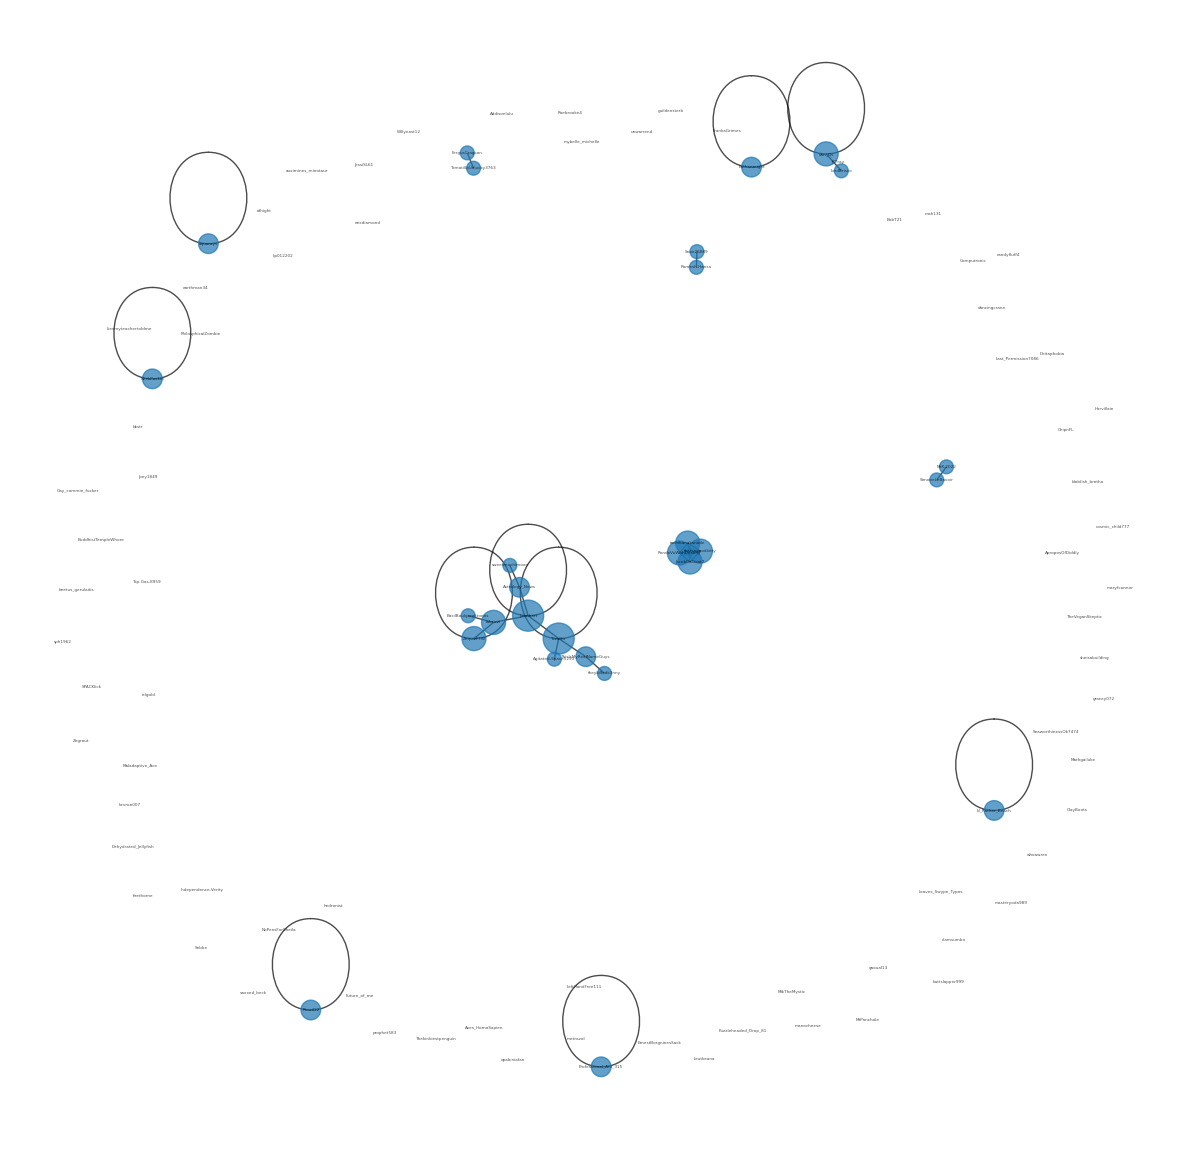

In [14]:
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Preprocess and vectorize the text
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform([i['text'] for i in reduced_data])

# Create a graph
G = nx.Graph()

# Add nodes (filtered to exclude items with missing 'username')
for i in reduced_data:
    if 'username' in i and i['username'] is not None:
        G.add_node(i['username'])


# Add edges based on content similarity
similarity_matrix = cosine_similarity(tfidf_matrix)
threshold = 0.3  # Define your threshold
for i, username1 in enumerate(i['username'] for i in reduced_data):
    for j, username2 in enumerate(i['username'] for i in reduced_data):
        if i < j and similarity_matrix[i, j] > threshold:
            if username1 is not None and username2 is not None:
                G.add_edge(username1, username2)


import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))  # Increase the size of the plot

# Compute the degree of each node (number of connections)
degrees = dict(G.degree())

# Draw the network
nx.draw_networkx(G, 
                 node_size=[v * 100 for v in degrees.values()],  # Node size based on degree
                 labels={node: node for node in G.nodes()},  # Add labels to nodes
                 font_size=3,  # Adjust font size
                 alpha=0.7,  # Node transparency
                 with_labels=True)

plt.axis('off')
plt.show()